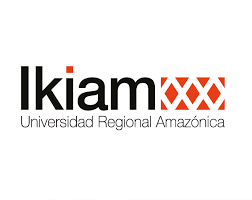

# EXAMEN PARCIAL PYTHON
    
## GBI6-2021II: BIOINFORMÁTICA

**Benalcazar Mera, Andres Mateo**

**03-08-2022**

In [2]:
import pandas as pd

In [3]:
tabla = pd.DataFrame({"Modelo" : pd.Categorical(["DESKTOP-U73I4LB",
                                                 "Color dorado",
                                                 "Pantalla ful HD no tactil"]),
                      "Sistema" : pd.Categorical(["Procesador AMD A9-9420",
                                                  "memoria RAM 8 GB",
                                                  "Sistema operativo Windows 10 de 64 bits"])}, index=[1,2,3])
tabla

,Modelo,Sistema
1,DESKTOP-U73I4LB,Procesador AMD A9-9420
2,Color dorado,memoria RAM 8 GB
3,Pantalla ful HD no tactil,Sistema operativo Windows 10 de 64 bits


Pregunta 1

In [16]:
!pip install biopython
!pip install reportlab
!pip install nglview

In [15]:
from miningscience import dowload_pubmed.cancer

SyntaxError: invalid syntax (2782920131.py, line 1)

In [39]:
from modulo0 import dowload_pubmed

ImportError: cannot import name 'dowload_pubmed' from 'modulo0' (C:\Users\User\Documents\sexto_semestre\Bioinformatica\GitHub\gbi6g01_2022\modulo0.py)

In [33]:
import re
import csv

In [34]:
with open('/Users/User/Documents/sexto_semestre/Bioinformatica/GitHub/gbi6g01_2022/pubmed_result.txt') as f:
    my_text = f.read()

In [35]:
len(my_text)

0